In [3]:
import os
import sys
import time
import calendar
import datetime

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy as sp
from scipy import stats
import tensorflow as tf

# from my_lib.field_config import data_encoder

# Setup

In [4]:
# ds_suffix = "vf10k"
ds_suffix = "-czech"
# max_seq_len = 80
# min_seq_len = 20

In [32]:
good_results = ['generated_data/gen_v2b__nld_4-dm_128-nh_2-i_1-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',
 'generated_data/tg_0-hd_24-nl_4-bs_64--len_20.csv',
'generated_data/dg_data_new.csv']

    
 # 'generated_data/gen_v2b-nd__nld_4-dm_128-nh_2-i_1-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',
 # 'generated_data/gen_v2b-nc__nld_4-dm_128-nh_2-i_1-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',
 # 'generated_data/gen_v2b-v__nld_4-dm_128-nh_2-i_2-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',


# gen_ds_file = "generated_data/h-gen_v2b__nld_4-dm_128-nh_2-i_0-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_80-v2.csv"
# fgen_file = "generated_data/f-czech-700__epoch-1000_bs-200_lr-g0005-d0005-a0005_epoch_id-299.csv"
# tg_file = "generated_data/h-gtg_0-hd_24-nl_4-bs_32--len_80.csv"

# gen_ds_file = []
gen_ds_file, tg_file, fgen_file = good_results




gen_df = pd.read_csv(gen_ds_file, parse_dates=["date"])
gen_df["datetime"] = gen_df["date"]
gen_df

,Unnamed: 0,amount,tcode_num,date_fields,days_passed,age,date,account_id,tcode,description,flag,type,datetime,td,raw_amount
0,0,1139.00,5,12/31,1,-1,2017-04-04,0,Rent__Utility Bill__Debit,Rent,Utility Bill,Debit,2017-04-04,1,-1139.00
1,1,38.50,0,12/31,6,-1,2017-04-10,0,Energy__Utility Bill__Debit,Energy,Utility Bill,Debit,2017-04-10,6,-38.50
2,2,1940.67,1,12/31,5,-1,2017-04-15,0,Monthly__Income__Credit,Monthly,Income,Credit,2017-04-15,5,1940.67
3,3,42.37,10,12/01,5,-1,2017-04-20,0,Gas Station - Car Fuel__Card Transaction__Debit,Gas Station - Car Fuel,Card Transaction,Debit,2017-04-20,5,-42.37
4,4,17.10,8,12/01,1,-1,2017-04-21,0,Groceries - Food & Drinks__Card Transaction__D...,Groceries - Food & Drinks,Card Transaction,Debit,2017-04-21,1,-17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,38.14,0,12/01,0,-1,2017-05-29,4999,Energy__Utility Bill__Debit,Energy,Utility Bill,Debit,2017-05-29,0,-38.14
99996,99996,2127.65,1,12/01,3,-1,2017-06-01,4999,Monthly__Income__Credit,Monthly,Income,Credit,2017-06-01,3,2127.65
99997,99997,18.28,25,12/31,4,-1,2017-06-05,4999,Three Mobile__Utility Bill__Debit,Three Mobile,Utility Bill,Debit,2017-06-05,4,-18.28
99998,99998,57.83,0,12/31,3,-1,2017-06-08,4999,Energy__Utility Bill__Debit,Energy,Utility Bill,Debit,2017-06-08,3,-57.83


In [33]:
real_df = pd.read_csv(f"real_data/final_df--uk.csv", parse_dates=["datetime"])
real_df["days_passed"] = real_df["td"]
real_df

,unnamed: 0,index,account_id,amount,balance,date,description,flag,id,type,...,datetime,month,day,dow,year,dtme,tcode,td,raw_amount,days_passed
0,28979,0,0014d0ef29aa9f93,-45.66,228.34,2017-04-24 11:00:00.000000,Energy,Utility Bill,38a21d894127b49d,Debit,...,2017-04-24 11:00:00,4,24,0,2017,6,Energy__Utility Bill__Debit,0.0,-45.66,0.0
1,30006,1,0014d0ef29aa9f93,2842.27,3070.61,2017-04-24 17:36:55.000000,Monthly,Income,3941e50e4613a49a,Credit,...,2017-04-24 17:36:55,4,24,0,2017,6,Monthly__Income__Credit,0.0,2842.27,0.0
2,32220,2,0014d0ef29aa9f93,-167.25,2903.36,2017-04-25 16:00:00.000000,Credit Card Payment,Credit Card,c09e8105dcfc85b7,Debit,...,2017-04-25 16:00:00,4,25,1,2017,5,Credit Card Payment__Credit Card__Debit,0.0,-167.25,0.0
3,35526,3,0014d0ef29aa9f93,-40.58,2862.78,2017-04-27 16:00:00.000000,Water Bill,Utility Bill,81e4ffc8df86920e,Debit,...,2017-04-27 16:00:00,4,27,3,2017,3,Water Bill__Utility Bill__Debit,2.0,-40.58,2.0
4,94259,4,0014d0ef29aa9f93,-43.16,2819.62,2017-05-23 17:00:00.000000,Energy,Utility Bill,c0ddd8f8a923d40f,Debit,...,2017-05-23 17:00:00,5,23,1,2017,8,Energy__Utility Bill__Debit,26.0,-43.16,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,89757,23,ffd5620bcbf69023,-34.82,2107.16,2017-05-20 15:50:57.000000,Shopping - Household Goods,Card Transaction,908ac96c72f6c3b7,Debit,...,2017-05-20 15:50:57,5,20,5,2017,11,Shopping - Household Goods__Card Transaction__...,0.0,-34.82,0.0
99996,91385,24,ffd5620bcbf69023,-36.50,2070.66,2017-05-22 08:00:00.000000,Water Bill,Utility Bill,66d16692309a0738,Debit,...,2017-05-22 08:00:00,5,22,0,2017,9,Water Bill__Utility Bill__Debit,1.0,-36.50,1.0
99997,91449,25,ffd5620bcbf69023,-38.13,2032.53,2017-05-22 09:00:00,Energy,Utility Bill,b71e06b7164af1e3,Debit,...,2017-05-22 09:00:00,5,22,0,2017,9,Energy__Utility Bill__Debit,0.0,-38.13,0.0
99998,93444,26,ffd5620bcbf69023,-42.59,1989.94,2017-05-22 20:47:15,Bar/Pub,Card Transaction,8a28f7eeff2dbabb,Debit,...,2017-05-22 20:47:15,5,22,0,2017,9,Bar/Pub__Card Transaction__Debit,0.0,-42.59,0.0


In [34]:
real_df.tcode = real_df.tcode.apply(lambda x: x.replace("$  $", "--"))

In [35]:
gen_df.tcode = gen_df.tcode.apply(lambda x: x.replace("$  $", "--"))

In [36]:


real_df["Amount"] = real_df.amount
real_df.amount = real_df.amount.apply(abs)


In [37]:
def describe(x):
    fns = ["mean", "median", "std", "min", "max"]
    for fn in fns:
        val = eval(f"np.{fn}(x)")
        print(f"{fn} is {val:.2f},", end="\t")
        
    fn = "log_abs_mean" 
    val = np.mean(np.log10(np.abs(x)+1.))
    print(f"{fn} is {val:.2f},")


In [38]:

fgen_df = pd.read_csv(fgen_file, parse_dates=["datetime"])
fgen_df["tcode"] = fgen_df.tcode.apply(lambda x: x.replace("---", "--"))
fgen_df.tcode.unique()

array(['BT Mobile__Utility Bill__Debit', 'O2 Mobile__Utility Bill__Debit',
       'Water Bill__Utility Bill__Debit',
       'BT Broadband__Utility Bill__Debit', 'Rent__Utility Bill__Debit',
       'TalkTalk Broadband__Utility Bill__Debit',
       'Energy__Utility Bill__Debit',
       'Credit Card Payment__Credit Card__Debit',
       'Monthly__Income__Credit', 'Vodafone Mobile__Utility Bill__Debit',
       'Graze__Subscription__Debit', 'Four-weekly__Income__Credit',
       'Shopping - Household Goods__Card Transaction__Debit',
       'Next Unilimited__Subscription__Debit',
       'Groceries - Food & Drinks__Card Transaction__Debit',
       'Amazon Prime__Subscription__Debit',
       'Public Transport__Card Transaction__Debit',
       'Mortgage__Utility Bill__Debit',
       'Sky Broadband__Utility Bill__Debit',
       'Gas Station - Car Fuel__Card Transaction__Debit',
       'Weekly__Income__Credit',
       'Tesco Mobile Mobile__Utility Bill__Debit',
       'Restaurant__Card Transaction_

In [39]:
fgen_df.columns

Index(['Unnamed: 0', 'tcode', 'amount', 'balance', 'dif', 'account_id', 'date',
       'month', 'day', 'dow', 'year', 'doy', 'dtme', 'td', 'type', 'flag',
       'description', 'amount_1', 'raw_amount', 'balance_raw', 'datetime',
       'days_passed'],
      dtype='object')

In [40]:

tg_df = pd.read_csv(tg_file, parse_dates=['datetime'])
tg_df["days_passed"] = tg_df["td"]
# tg_df["tcode"] = fgen_df.tcode.apply(lambda x: x.replace("---", "--"))
tg_df

,tcode_num,td,amount,age,account_id,datetime,tcode,description,flag,type,raw_amount,days_passed
0,17,2.0,627.05,-1.0,0,2017-04-06,Mortgage__Utility Bill__Debit,Mortgage,Utility Bill,Debit,-627.05,2.0
1,1,10.0,791.02,-1.0,0,2017-04-16,Monthly__Income__Credit,Monthly,Income,Credit,791.02,10.0
2,1,9.0,1284.78,-1.0,0,2017-04-25,Monthly__Income__Credit,Monthly,Income,Credit,1284.78,9.0
3,1,8.0,1421.59,-1.0,0,2017-05-03,Monthly__Income__Credit,Monthly,Income,Credit,1421.59,8.0
4,1,7.0,1414.32,-1.0,0,2017-05-10,Monthly__Income__Credit,Monthly,Income,Credit,1414.32,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,8,-0.0,5.22,-1.0,4999,2017-04-22,Groceries - Food & Drinks__Card Transaction__D...,Groceries - Food & Drinks,Card Transaction,Debit,-5.22,-0.0
99996,8,-0.0,4.30,-1.0,4999,2017-04-22,Groceries - Food & Drinks__Card Transaction__D...,Groceries - Food & Drinks,Card Transaction,Debit,-4.30,-0.0
99997,8,-0.0,2.79,-1.0,4999,2017-04-22,Groceries - Food & Drinks__Card Transaction__D...,Groceries - Food & Drinks,Card Transaction,Debit,-2.79,-0.0
99998,8,-0.0,1.27,-1.0,4999,2017-04-22,Groceries - Food & Drinks__Card Transaction__D...,Groceries - Food & Drinks,Card Transaction,Debit,-1.27,-0.0


## Transaction rates

In [41]:
d = pd.DataFrame.from_records([real_df.groupby("account_id").first().datetime, 
                               real_df.groupby("account_id").last().datetime]).T


d["n"] = real_df.groupby("account_id").size()
d

,0,1,n
account_id,,,
0014d0ef29aa9f93,2017-04-24 11:00:00,2017-05-25 09:00:00.000000,7
001773ad5c9fa0c6,2017-04-13 14:00:00,2017-05-25 13:00:00.000000,7
002cf9c2c7df2a98,2017-04-15 15:00:00,2017-05-24 19:00:00.000000,11
002d4eea12789354,2017-04-10 12:00:00,2017-05-25 08:26:46.000000,26
00385b3ab3203334,2017-04-08 09:00:00,2017-05-25 19:15:05.000000,30
...,...,...,...
ffae695570240896,2017-04-15 20:00:00,2017-05-25 12:46:59.000000,16
ffb708a1ec72d95a,2017-04-04 18:00:00,2017-05-20 17:48:30.000000,32
ffb78770505be1c7,2017-04-01 16:00:00,2017-05-25 14:19:26.157666,35


In [42]:
d['rate'] =  d.apply(lambda x: (x[1] - x[0]) / x.n, axis=1)
d

,0,1,n,rate
account_id,,,,
0014d0ef29aa9f93,2017-04-24 11:00:00,2017-05-25 09:00:00.000000,7,4 days 10:00:00
001773ad5c9fa0c6,2017-04-13 14:00:00,2017-05-25 13:00:00.000000,7,5 days 23:51:25.714285714
002cf9c2c7df2a98,2017-04-15 15:00:00,2017-05-24 19:00:00.000000,11,3 days 13:27:16.363636363
002d4eea12789354,2017-04-10 12:00:00,2017-05-25 08:26:46.000000,26,1 days 17:24:06.384615384
00385b3ab3203334,2017-04-08 09:00:00,2017-05-25 19:15:05.000000,30,1 days 13:56:30.166666666
...,...,...,...,...
ffae695570240896,2017-04-15 20:00:00,2017-05-25 12:46:59.000000,16,2 days 11:32:56.187500
ffb708a1ec72d95a,2017-04-04 18:00:00,2017-05-20 17:48:30.000000,32,1 days 10:29:38.437500
ffb78770505be1c7,2017-04-01 16:00:00,2017-05-25 14:19:26.157666,35,1 days 12:58:50.461647600


In [43]:

d["ave_days_per_tr"] = d.rate.apply(lambda x: x.total_seconds()/(3600*24))
d

,0,1,n,rate,ave_days_per_tr
account_id,,,,,
0014d0ef29aa9f93,2017-04-24 11:00:00,2017-05-25 09:00:00.000000,7,4 days 10:00:00,4.416667
001773ad5c9fa0c6,2017-04-13 14:00:00,2017-05-25 13:00:00.000000,7,5 days 23:51:25.714285714,5.994048
002cf9c2c7df2a98,2017-04-15 15:00:00,2017-05-24 19:00:00.000000,11,3 days 13:27:16.363636363,3.560606
002d4eea12789354,2017-04-10 12:00:00,2017-05-25 08:26:46.000000,26,1 days 17:24:06.384615384,1.725074
00385b3ab3203334,2017-04-08 09:00:00,2017-05-25 19:15:05.000000,30,1 days 13:56:30.166666666,1.580905
...,...,...,...,...,...
ffae695570240896,2017-04-15 20:00:00,2017-05-25 12:46:59.000000,16,2 days 11:32:56.187500,2.481206
ffb708a1ec72d95a,2017-04-04 18:00:00,2017-05-20 17:48:30.000000,32,1 days 10:29:38.437500,1.437250
ffb78770505be1c7,2017-04-01 16:00:00,2017-05-25 14:19:26.157666,35,1 days 12:58:50.461647600,1.540862


In [62]:
df = tg_df

d = pd.DataFrame.from_records([df.groupby("account_id").datetime.min(), 
                               df.groupby("account_id").datetime.max()]).T

d["n"] = df.groupby("account_id").size()
d['rate'] =  d.apply(lambda x: (x[1] - x[0]) / x.n, axis=1)
d["ave_days_per_tr"] = d.rate.apply(lambda x: x.total_seconds()/(3600*24))

In [59]:
df.groupby("account_id").first().datetime

account_id
0      2017-04-06
1      2017-04-12
2      2017-04-08
3      2017-04-17
4      2017-04-05
          ...    
4995   2017-04-03
4996   2017-04-03
4997   2017-04-02
4998   2017-04-12
4999   2017-04-04
Name: datetime, Length: 5000, dtype: datetime64[ns]

In [61]:
df.groupby("account_id").datetime.min()

account_id
0      2017-04-06
1      2017-04-12
2      2017-04-08
3      2017-04-17
4      2017-04-05
          ...    
4995   2017-04-03
4996   2017-04-03
4997   2017-04-02
4998   2017-04-12
4999   2017-04-04
Name: datetime, Length: 5000, dtype: datetime64[ns]

In [63]:
d.rate.min()

Timedelta('0 days 00:00:00')

In [44]:
def get_rate_df(df):
    
    d = pd.DataFrame.from_records([df.groupby("account_id").first().datetime, 
                                   df.groupby("account_id").last().datetime]).T

    d["n"] = df.groupby("account_id").size()
    d['rate'] =  d.apply(lambda x: (x[1] - x[0]) / x.n, axis=1)
    d["ave_days_per_tr"] = d.rate.apply(lambda x: x.total_seconds()/(3600*24))

    return d

##### Need to remove accounts with < 2 transactions

In [45]:
fgen_df.groupby("account_id").size().describe()

count    5000.000000
mean       19.045600
std        10.212854
min         1.000000
25%        10.000000
50%        15.000000
75%        28.000000
max        48.000000
dtype: float64

In [53]:
tg_df.groupby("account_id").size().describe()

count    5000.0
mean       20.0
std         0.0
min        20.0
25%        20.0
50%        20.0
75%        20.0
max        20.0
dtype: float64

In [46]:
gb = fgen_df.groupby("account_id")
s = gb.size()==1
s[s]

account_id
3572.0    True
4409.0    True
4973.0    True
dtype: bool

In [47]:
fgen_df = fgen_df[fgen_df.account_id.apply(lambda x: x != 3084. and x != 3946.0)]

In [48]:
d_r = get_rate_df(real_df)
d_bf = get_rate_df(gen_df)
d_tg = get_rate_df(tg_df)
d_dg = get_rate_df(fgen_df)

In [49]:
d_r.ave_days_per_tr.describe().reset_index()

,index,ave_days_per_tr
0,count,5000.000000
1,mean,3.069296
2,std,1.611316
3,min,0.236111
4,25%,1.661697
5,50%,2.695420
6,75%,4.238873
7,max,10.437500


In [54]:
d_tg.ave_days_per_tr.describe().reset_index()

,index,ave_days_per_tr
0,count,5000.000000
1,mean,1.332900
2,std,1.702428
3,min,-0.050000
4,25%,0.050000
5,50%,0.550000
6,75%,2.100000
7,max,9.400000


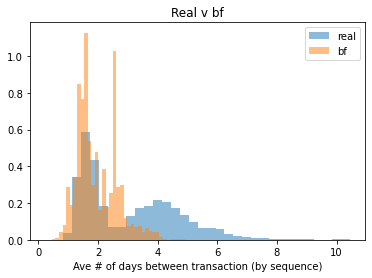

,real,bf,diff
count,5000.000000,5000.000000,0.000000
mean,3.069296,1.968760,1.100536
std,1.611316,0.676942,0.934374
min,0.236111,0.450000,0.213889
25%,1.661697,1.450000,0.211697
50%,2.695420,1.750000,0.945420
75%,4.238873,2.500000,1.738873
max,10.437500,4.900000,5.537500


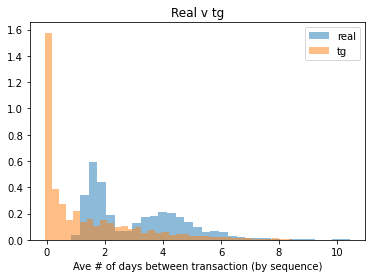

,real,tg,diff
count,5000.000000,5000.000000,0.000000
mean,3.069296,1.332900,1.736396
std,1.611316,1.702428,0.091112
min,0.236111,-0.050000,0.286111
25%,1.661697,0.050000,1.611697
50%,2.695420,0.550000,2.145420
75%,4.238873,2.100000,2.138873
max,10.437500,9.400000,1.037500


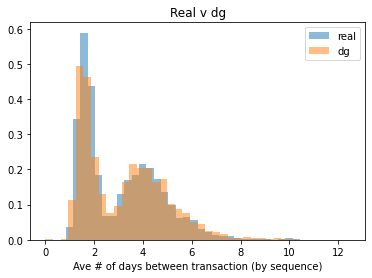

,real,dg,diff
count,5000.000000,4998.000000,2.000000
mean,3.069296,3.208865,0.139569
std,1.611316,1.687019,0.075703
min,0.236111,0.000000,0.236111
25%,1.661697,1.677708,0.016011
50%,2.695420,3.104946,0.409526
75%,4.238873,4.371356,0.132483
max,10.437500,12.478883,2.041383


In [50]:

diffs = {}

for df, lbl in zip([d_bf, d_tg, d_dg], ['bf', 'tg', 'dg']):
    
    plt.hist(d_r.ave_days_per_tr, bins='auto', label="real", alpha=0.5, density=True)
    plt.hist(df.ave_days_per_tr, bins='auto', label=lbl, alpha=0.5, density=True)
    plt.title(f"Real v {lbl}")
    plt.xlabel("Ave # of days between transaction (by sequence)")
    plt.legend()
    plt.show()
    
    d = pd.DataFrame.from_records([dict(d_r.ave_days_per_tr.describe()), dict(df.ave_days_per_tr.describe())]).T
    d.columns = ["real", lbl]
    d["diff"] = (d['real'] - d[lbl]).abs()
    display(d)
    
    diffs[lbl] = d["diff"]
    
    print("\n\n")
    

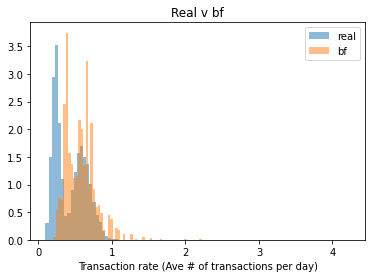

,real,bf,diff
count,5000.000000,5000.000000,0.000000
mean,3.069296,1.968760,1.100536
std,1.611316,0.676942,0.934374
min,0.236111,0.450000,0.213889
25%,1.661697,1.450000,0.211697
50%,2.695420,1.750000,0.945420
75%,4.238873,2.500000,1.738873
max,10.437500,4.900000,5.537500


ValueError: supplied range of [-20.0, inf] is not finite

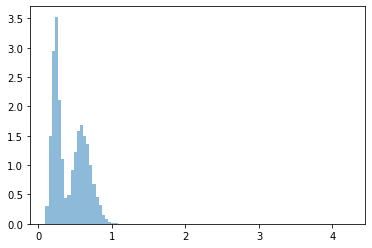

In [52]:

diffs = {}

for df, lbl in zip([d_bf, d_tg, d_dg], ['bf', 'tg', 'dg']):
    
    plt.hist(1./ d_r.ave_days_per_tr, bins='auto', label="real", alpha=0.5, density=True)
    plt.hist(1. / df.ave_days_per_tr, bins='auto', label=lbl, alpha=0.5, density=True)
    plt.title(f"Real v {lbl}")
    plt.xlabel("Transaction rate (Ave # of transactions per day)")
    plt.legend()
    plt.show()
    
    d = pd.DataFrame.from_records([dict(d_r.ave_days_per_tr.describe()), dict(df.ave_days_per_tr.describe())]).T
    d.columns = ["real", lbl]
    d["diff"] = (d['real'] - d[lbl]).abs()
    display(d)
    
    diffs[lbl] = d["diff"]
    
    print("\n\n")
    

In [190]:
fgen_df.groupby("account_id").size().describe()

count    4500.000000
mean      211.436889
std        98.199428
min         1.000000
25%       129.000000
50%       203.000000
75%       295.000000
max       397.000000
dtype: float64

In [141]:
pd.DataFrame.from_dict(diffs)

,d_bf,d_tg,d_dg
count,500.000000,500.000000,0.000000
mean,0.856939,1.457139,5.309239
std,1.799667,2.011266,3.248500
min,0.205523,1.455523,2.593023
25%,0.467983,1.280483,4.173913
50%,0.578133,1.078133,4.842909
75%,0.584044,0.784044,5.532746
max,20.891667,47.479167,55.770720


In [162]:
code = real_df.tcode.unique()[2]
code 

'INTEREST CREDITED__nan__CREDIT'

In [163]:
(real_df.dtme == 0).sum() / len(real_df)

0.33083345955770976

In [164]:
real_df[real_df.tcode==code].dtme.sum()

0

In [173]:
(gen_df[gen_df.tcode==code].dtme==0).sum()/len(gen_df[gen_df.tcode==code])

0.9979218979998268

In [171]:
(gen_df[gen_df.tcode==code].dtme<60).sum()/len(gen_df)

0.173235

In [172]:
gen_df[gen_df.tcode==code].dtme<60

2         True
5         True
8         True
11        True
14        True
          ... 
399967    True
399973    True
399979    True
399988    True
399993    True
Name: dtme, Length: 69294, dtype: bool

In [176]:
real_props = []
gen_props  = []

tcode_percent_of_total = []

numer = 0.
denom = 0.

for tcode in real_df.tcode.unique():
    has_tcode = real_df.tcode == tcode
    prop_real = real_df[has_tcode].datetime.dt.is_month_end.sum() / len(real_df[has_tcode]) *100
    
    tcode_percent_of_total.append(sum(has_tcode) / len(real_df)*100)

    has_tcode = gen_df.tcode == tcode
    prop_gen = gen_df[has_tcode].date.dt.is_month_end.sum() / len(gen_df[has_tcode]) * 100
    
    
    if prop_real >= 100.:
        # print("**")
        
        numer += gen_df[has_tcode].date.dt.is_month_end.sum()
        denom += len(gen_df[has_tcode])

    print(f"For real data {prop_real:.3f}% of {tcode} occur on month end. This tcode is {tcode_percent_of_total[-1]:.2f}% of real data")
    print(f"For genr data {prop_gen:.3f}% of {tcode} occur on month end")
    
    print("\n")
    
    real_props.append(prop_real)
    gen_props.append(prop_gen)
    

For real data 1.330% of nan__CREDIT IN CASH__CREDIT occur on month end. This tcode is 14.84% of real data
For genr data 2.203% of nan__CREDIT IN CASH__CREDIT occur on month end


For real data 0.000% of nan__COLLECTION FROM ANOTHER BANK__CREDIT occur on month end. This tcode is 3.30% of real data
For genr data 0.468% of nan__COLLECTION FROM ANOTHER BANK__CREDIT occur on month end


For real data 100.000% of INTEREST CREDITED__nan__CREDIT occur on month end. This tcode is 17.34% of real data
For genr data 99.792% of INTEREST CREDITED__nan__CREDIT occur on month end


For real data 2.414% of nan__CASH WITHDRAWAL__DEBIT occur on month end. This tcode is 25.94% of real data
For genr data 5.360% of nan__CASH WITHDRAWAL__DEBIT occur on month end


For real data 100.000% of PAYMENT ON STATEMENT__CASH WITHDRAWAL__DEBIT occur on month end. This tcode is 14.75% of real data
For genr data 99.422% of PAYMENT ON STATEMENT__CASH WITHDRAWAL__DEBIT occur on month end


For real data 0.000% of HOUSEHOL

In [177]:
numer/ denom

0.9959789575523038

In [184]:
real_df[np.logical_and(real_df.raw_amount > 14.0, real_df.raw_amount < 15.0)].k_symbol.unique()

array(['INTEREST CREDITED'], dtype=object)